<a href="https://colab.research.google.com/github/Samwel-93/Week-7-IP-Hass-Consulting-Company-Real-Estate-Project-/blob/main/Moringa_Core_Week_7_IP_Samwel_Omondi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hass ConsultingCompany: House Prices Predictions**

**Hass Consulting Company**  is a real estate leader with over 25 years of experience. We have been tasked to:

## **1. Define the Question**

### a) Specifying the Question

1.   Study the factors that affect housing prices using the given information on real estate properties.  
2.   Create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

> Results showing the main factors that affect housing prices
> A housing prices predicition model based on the factors that affect their prices. 

### c) Understanding the context 

The dataset to use for this project can be found by following this link: 
[link](http://bit.ly/IndependentProjectWeek7Dataset)

Below is the dataset glossary:

* id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

### d) Recording the Experimental Design

We are expected to:

* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording your observations.
* Performing regression analysis.
* Incorporate categorical independent variables into your models.
* Check for multicollinearity
* Provide a recommendation based on your analysis. 
* Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
* Challenge your solution by providing insights on how you can make improvements in model improvement.

### d) Data Relevance

> Appropriate dataset is provided that contain different factors that affect housing prices such as price of the house, number of rooms, size, location among others. 

## **2. Reading the Data**

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import scipy as sp
import random
import sklearn
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline



In [2]:
# Loading the Datasets
# Housing Dataset
#
housing_df = pd.read_csv('Independent Project Week 7 - house_data.csv')


## **3. Checking the Data**

In [3]:
# Determining the no. of records in the housing dataset
#
housing_df.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Columns: 20 entries, id to sqft_lot15
dtypes: float64(5), int64(15)
memory usage: 3.3 MB


In [4]:
# Dataset summary of results dataset
#
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [5]:
# Checking the shape of our dataset
#
housing_df.shape

(21613, 20)

In [6]:
# Checking for unique values in our dataset columns
#
housing_df.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [7]:
# Previewing our dataset head
#
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
# Previewing the bottom of our dataset
# 
housing_df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
# Statistic summary of our dataset
#
housing_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## **4. Cleaning the Dataset**

In [10]:
# Checking for Duplicates
# 
print('Number of duplicates before tyding:' +str(housing_df.duplicated().sum()))


Number of duplicates before tyding:3


In [11]:
# Dealing with duplicates
#
housing_df = housing_df.drop_duplicates()

print('Number of duplicates after tyding:' +str(housing_df.duplicated().sum()))

Number of duplicates after tyding:0


In [12]:
# Dropping columns that are not relevant from our ranking dataset
#
housing_df = housing_df.drop(columns = ['id', 
                                        'lat', 
                                        'long'])
housing_df.head()



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [13]:
# Add a new column "Hse_yr" that is derived from yr_built & yr_renovated columns 

def year (y):
  if y['yr_renovated'] > 0:
    return y ['yr_renovated']
  else:
    return y ['yr_built']

# Apply function and add new column
housing_df ['Hse_yr'] = (housing_df.apply(lambda y: year(y), axis = 1)).astype(int)

housing_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,Hse_yr
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,1991
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,1987


In [14]:
# We then drop 'yr_built' and 'yr_renovated' columns
housing_df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)

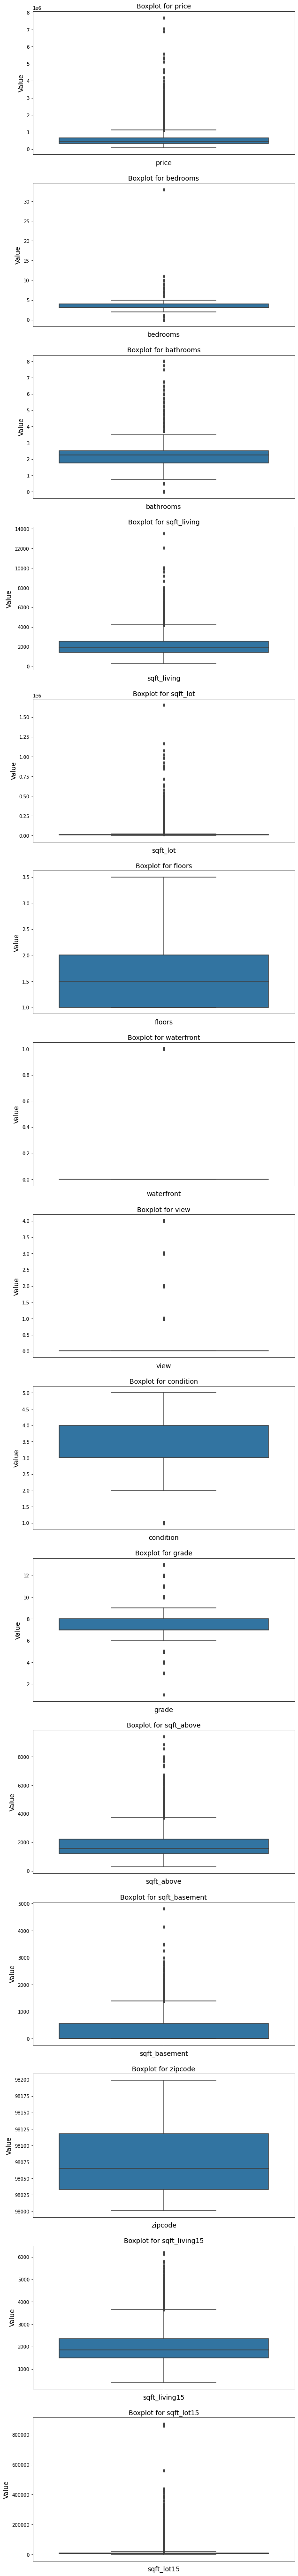

In [15]:
# Checking for Outliers on 'rank' column and Visualization using boxplot
#

columns = ['price',	'bedrooms',	'bathrooms',	'sqft_living',	'sqft_lot',	'floors',	'waterfront',	'view',	'condition',	'grade',	'sqft_above',	'sqft_basement',	'zipcode',	'sqft_living15',	'sqft_lot15']
house_fig, ax = plt.subplots(len (columns), figsize = (10, 100))

for i, val in enumerate(columns):
  sns.boxplot(y=housing_df[val], ax=ax[i])
  ax[i].set_title('Boxplot for {}'.format(val), fontsize=14)
  ax[i].set_xlabel(val, fontsize=14)
  ax[i].set_ylabel('Value', fontsize=14)



A significant outliers observed. In this case, we shall not drop the outliers given because we might lose critical data if we drop these values.

In [16]:
# Identifying the Missing Data
#
housing_df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
zipcode          0
sqft_living15    0
sqft_lot15       0
Hse_yr           0
dtype: int64

In [17]:
# Dealing with missing data

# As observed above, there are no missing data.

## **5. Exploratory Data Analysis**

### A. Univariate Summaries

In [18]:
# Statistic summary of the dataset
housing_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,Hse_yr
count,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,98077.945673,1986.518695,12769.031976,1973.382786
std,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,53.505373,685.425781,27305.972464,28.807187
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,399.000000,651.000000,1900.000000
25%,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,1954.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,1977.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,1999.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,2015.000000


Text(0, 0.5, 'Count')

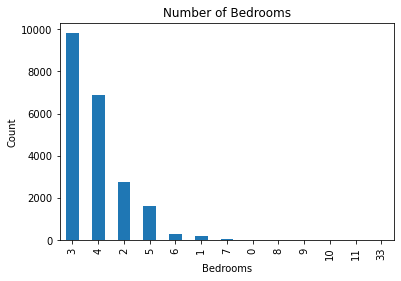

In [19]:
# Most common house by count of number of bedrooms

housing_df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')



3 bedroom houses are the most commonly sold houses, followed by 4 bedroom then 2 bedroom.

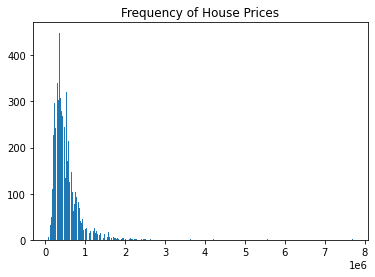

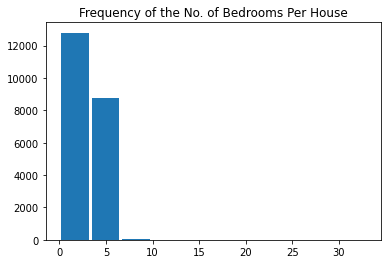

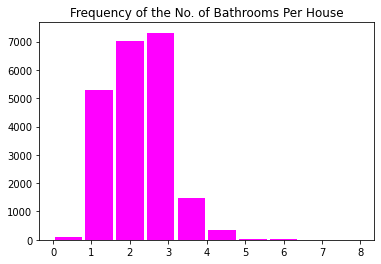

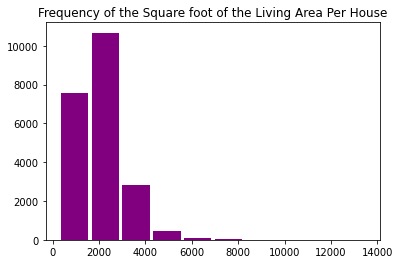

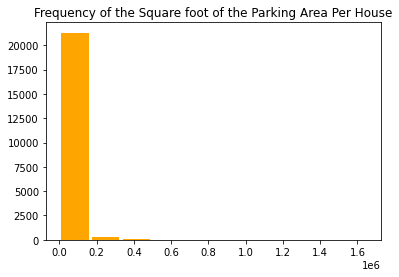

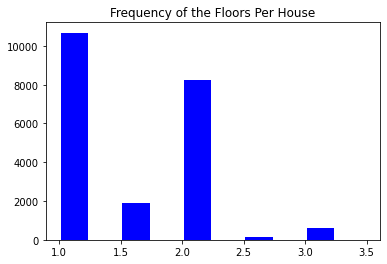

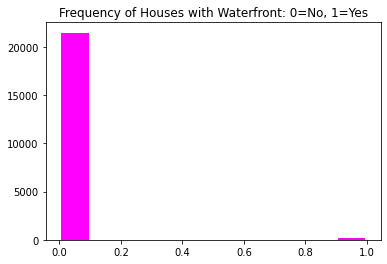

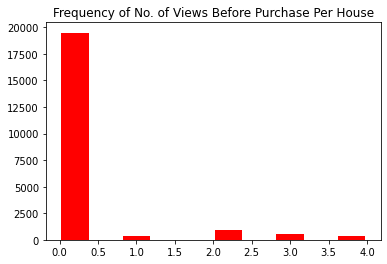

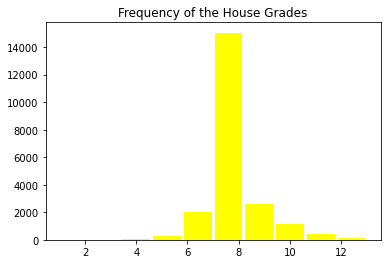

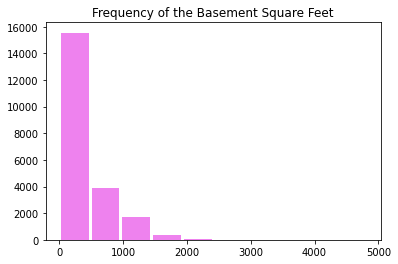

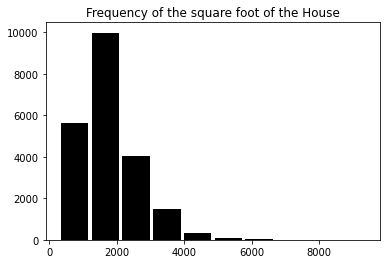

In [20]:
#Plot a histogram to show distribution of values in our data set
#
plt.hist(housing_df['price'], bins = 1000, rwidth = 0.9)
plt.title('Frequency of House Prices')
plt.show()

plt.hist(housing_df['bedrooms'], rwidth = 0.9)
plt.title('Frequency of the No. of Bedrooms Per House')
plt.show()

plt.hist(housing_df['bathrooms'], rwidth = 0.9, color = "magenta")
plt.title('Frequency of the No. of Bathrooms Per House')
plt.show()

plt.hist(housing_df['sqft_living'], rwidth = 0.9, color = "purple")
plt.title('Frequency of the Square foot of the Living Area Per House')
plt.show()

plt.hist(housing_df['sqft_lot'], rwidth = 0.9, color = "orange")
plt.title('Frequency of the Square foot of the Parking Area Per House')
plt.show()

plt.hist(housing_df['floors'], rwidth = 0.9, color = "blue")
plt.title('Frequency of the Floors Per House')
plt.show()
 
plt.hist(housing_df['waterfront'], rwidth = 0.9, color = "magenta")
plt.title('Frequency of Houses with Waterfront: 0=No, 1=Yes')
plt.show()

plt.hist(housing_df['view'], rwidth = 0.9, color = "red")
plt.title('Frequency of No. of Views Before Purchase Per House')
plt.show()

plt.hist(housing_df['grade'], rwidth = 0.9, color = "yellow")
plt.title('Frequency of the House Grades')
plt.show()

plt.hist(housing_df['sqft_basement'], rwidth = 0.9, color = "violet")
plt.title('Frequency of the Basement Square Feet')
plt.show()

plt.hist(housing_df['sqft_above'], rwidth = 0.9, color = "black")
plt.title('Frequency of the square foot of the House')
plt.show()



### B) Bivariate Analysis

Text(0.5, 1.0, 'Price vs Living Area Square Feet')

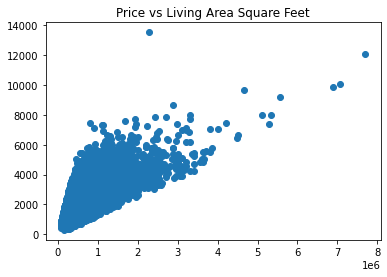

In [21]:

plt.scatter(housing_df.price,housing_df.sqft_living)
plt.title("Price vs Living Area Square Feet")

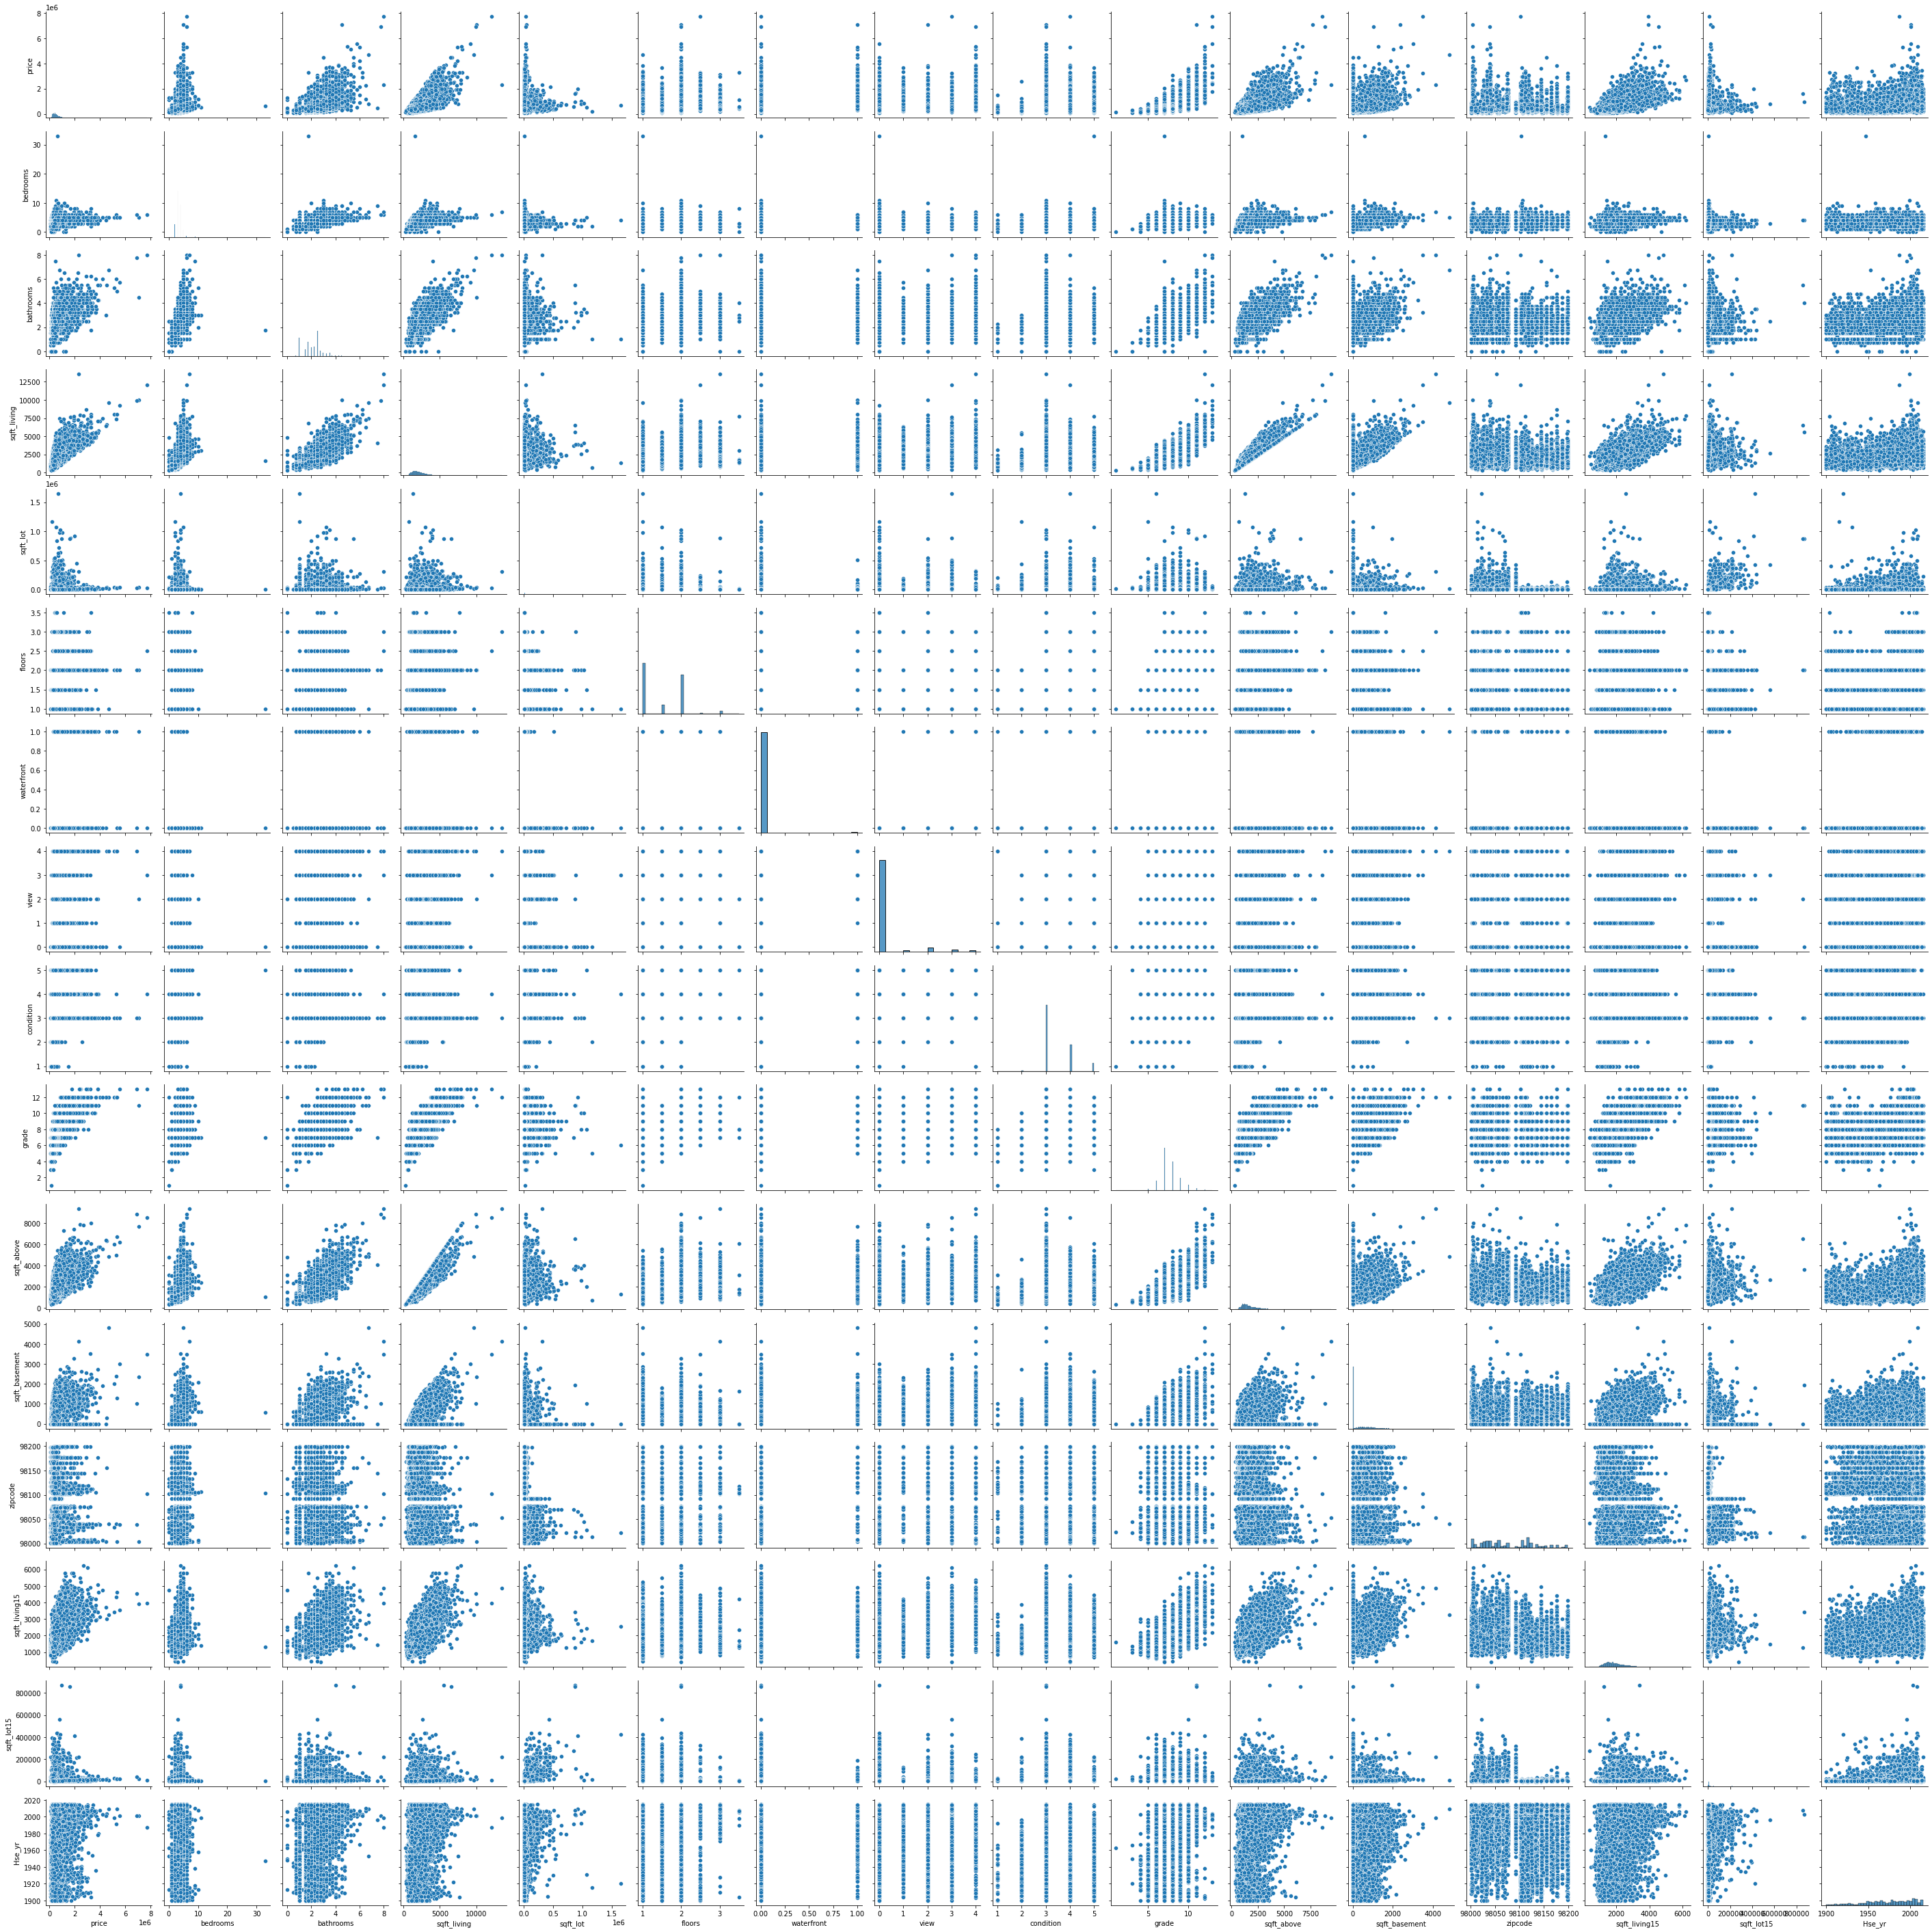

In [22]:
# plot a pair plot
sns.pairplot(housing_df)

plt.show()

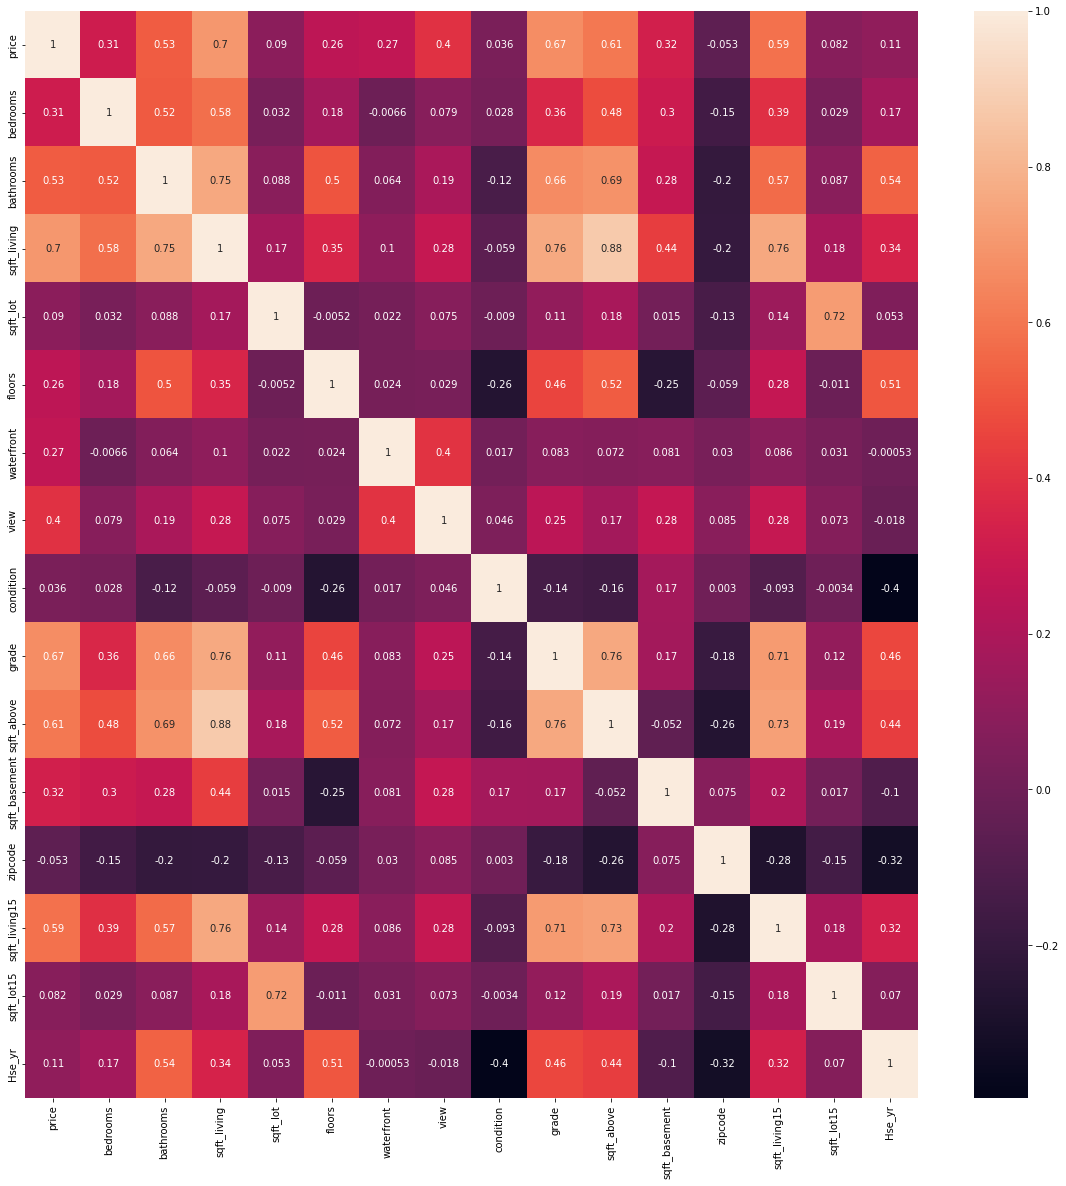

In [23]:
# plot a correlation matrix
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(housing_df.corr(), annot=True)
plt.show()

## **Multiple Linear Regression**

In [24]:
# Initialize linear regression to a variable re
#
regressor = LinearRegression()

# Prices are the predicted hence we set output lables as price columns
#
y = housing_df['price']

# We then put the independent variables in one subset
X = housing_df.drop(['price'], axis=1)

# preview dataset
housing_df.head(1)



,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,Hse_yr
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,1955


In [25]:
# Checking for correlations between variables
#
cor = X.corr()
cor

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,Hse_yr
bedrooms,1.000000,0.515935,0.576674,0.031699,0.175448,-0.006583,0.079433,0.028422,0.357003,0.477619,0.303077,-0.152721,0.391633,0.029233,0.165551
bathrooms,0.515935,1.000000,0.754688,0.087750,0.500669,0.063747,0.187891,-0.124940,0.664990,0.685351,0.283814,-0.203831,0.568665,0.087191,0.537159
sqft_living,0.576674,0.754688,1.000000,0.172830,0.353954,0.103820,0.284641,-0.058768,0.762719,0.876600,0.435054,-0.199435,0.756420,0.183285,0.343761
sqft_lot,0.031699,0.087750,0.172830,1.000000,-0.005171,0.021601,0.074753,-0.008967,0.113644,0.183527,0.015271,-0.129611,0.144620,0.718556,0.052943
floors,0.175448,0.500669,0.353954,-0.005171,1.000000,0.023711,0.029325,-0.263779,0.458151,0.523874,-0.245673,-0.059025,0.279861,-0.011250,0.505363
waterfront,-0.006583,0.063747,0.103820,0.021601,0.023711,1.000000,0.401993,0.016652,0.082785,0.072080,0.080585,0.030277,0.086469,0.030702,-0.000527
view,0.079433,0.187891,0.284641,0.074753,0.029325,0.401993,1.000000,0.045836,0.251378,0.167659,0.276996,0.084838,0.280404,0.072577,-0.018278
condition,0.028422,-0.124940,-0.058768,-0.008967,-0.263779,0.016652,0.045836,1.000000,-0.144655,-0.158212,0.174071,0.002962,-0.092854,-0.003424,-0.396342
grade,0.357003,0.664990,0.762719,0.113644,0.458151,0.082785,0.251378,-0.144655,1.000000,0.755919,0.168443,-0.184795,0.713208,0.119265,0.460767
sqft_above,0.477619,0.685351,0.876600,0.183527,0.523874,0.072080,0.167659,-0.158212,0.755919,1.000000,-0.051923,-0.261163,0.731870,0.194060,0.435894


In [26]:
# Convert years into 1's and 0's where we use 1 for houses built before 2014
#cov_yr = [1 if values  == 2014 else 0 for values in housing_df.Hse_yr]
#housing_df['Hse_yr'] = cov_yr

In [27]:
# Dividing our data into training and test sets
#
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [28]:
# fit our train and test data into linear regression model
regressor.fit(x_train, y_train)

LinearRegression()

In [29]:
# Checking the score of our data
regressor.score(x_test, y_test)

0.6367468561193428

In [30]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-40824.285282
bathrooms,40547.310871
sqft_living,118.528289
sqft_lot,-0.065808
floors,21264.836323
waterfront,599916.502443
view,45918.843273
condition,19262.651994
grade,115566.372997
sqft_above,49.104289


In [31]:
# Making predictions on 
#

# Test data prediction
y_pred = regressor.predict(x_test)

# Compare actual output values for x_test with predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
12180,240000.0,301580.088233
13560,290000.0,411412.448683
8371,435000.0,453527.906119
9209,443500.0,402307.227843
11440,848000.0,949713.310481
...,...,...
19143,635500.0,280544.121114
13520,439000.0,521084.973201
20504,319900.0,389418.524935
1080,208000.0,433160.023782


In [32]:
# Evaluating the Algorithm
# ---
# 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Variance score: {0:.2f}'.format(regressor.score(X, y)))

Mean Absolute Error: 146245.24879590553
Mean Squared Error: 50459883202.930695
Root Mean Squared Error: 224632.7741068313
Variance score: 0.64


I’ve made my train data as 80% and 20% of the data to be my test data , and randomized the splitting of data by using random_state.

The accuracy of the model is lower than (64%) an aim of 80% hence we need to used a different regression model

### Residual Plots

In [33]:
# Creating the residual by subtracting the test value from the predicted value
residuals = np.subtract(y_pred, y_test)

# statistical description
residual = pd.DataFrame(residuals).describe()

# compute the mean of the residuals 
residuals.mean()


-1981.886293470507

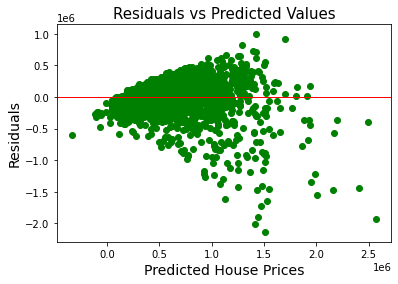

In [34]:
# create a scatter plot of residuals vs predicted values
#
plt.scatter(y_pred, residuals, color = 'green')

plt.title('Residuals vs Predicted Values', fontsize = 15,)
plt.ylabel('Residuals', fontsize = 14)
plt.xlabel('Predicted House Prices', fontsize = 14)
plt.axhline(y = residuals.mean(), color = 'r', linewidth = 1)
plt.show()

The residuals have a normal distribution

### Heterosedasticity test

In [35]:
# compute the test result and p-value of the test
test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# compute the critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

# If the test_result is greater than the critical value, reject the null hypothesis. 
# This means there are patterns to the variance of the data

# Otherwise, identify no patterns, and  accept the null hypothesis 
# The variance is homogeneous across our data

if(test_result > critical_value):
    print("the variances are unequal, and the model should be reassessed")
else:
    print("The variances are homogeneous!")

The variances are homogeneous!


## Quantile Regression

In [36]:
# Defining the range of the quantiles
quantiles = np.arange(0.1, 1.0, 0.1)
import statsmodels.formula.api as smf

mod = smf.quantreg('price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above', data =housing_df)

for qt in quantiles:
  res = mod.fit(qt)
  print(res.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2371
Model:                       QuantReg   Bandwidth:                   2.467e+04
Method:                 Least Squares   Sparsity:                    4.656e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:19   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -3.337e+05   9297.166    -35.889      0.000   -3.52e+05   -3.15e+05
bedrooms    -1.501e+04   1208.667    -12.420      0.000   -1.74e+04   -1.26e+04
bathrooms     570.1938   1969.701      0.289      0.772   -3290.566    4430.953
sqft_living    98.8205      2.980     33.157   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2583
Model:                       QuantReg   Bandwidth:                   2.359e+04
Method:                 Least Squares   Sparsity:                    4.168e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:21   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.564e+05   1.12e+04    -40.734      0.000   -4.78e+05   -4.34e+05
bedrooms    -2.143e+04   1435.405    -14.933      0.000   -2.42e+04   -1.86e+04
bathrooms   -1.089e+04   2379.328     -4.579      0.000   -1.56e+04   -6230.525
sqft_living   129.4069      3.572     36.224   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.2872
Model:                       QuantReg   Bandwidth:                   2.431e+04
Method:                 Least Squares   Sparsity:                    4.008e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:24   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -5.36e+05   1.28e+04    -41.824      0.000   -5.61e+05   -5.11e+05
bedrooms    -2.558e+04   1612.176    -15.868      0.000   -2.87e+04   -2.24e+04
bathrooms   -1.827e+04   2676.728     -6.826      0.000   -2.35e+04    -1.3e+04
sqft_living   151.9993      3.907     38.902   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3165
Model:                       QuantReg   Bandwidth:                   2.578e+04
Method:                 Least Squares   Sparsity:                    3.908e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:26   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.484e+05   1.39e+04    -39.369      0.000   -5.76e+05   -5.21e+05
bedrooms    -2.873e+04   1729.208    -16.612      0.000   -3.21e+04   -2.53e+04
bathrooms    -2.31e+04   2849.102     -8.107      0.000   -2.87e+04   -1.75e+04
sqft_living   168.9027      4.042     41.791   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3439
Model:                       QuantReg   Bandwidth:                   2.648e+04
Method:                 Least Squares   Sparsity:                    3.825e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:28   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.784e+05   1.44e+04    -40.082      0.000   -6.07e+05    -5.5e+05
bedrooms    -2.701e+04   1788.853    -15.098      0.000   -3.05e+04   -2.35e+04
bathrooms   -2.649e+04   2890.367     -9.166      0.000   -3.22e+04   -2.08e+04
sqft_living   179.6941      3.996     44.968   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3703
Model:                       QuantReg   Bandwidth:                   2.590e+04
Method:                 Least Squares   Sparsity:                    3.880e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:30   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.761e+05   1.49e+04    -38.551      0.000   -6.05e+05   -5.47e+05
bedrooms    -2.531e+04   1858.832    -13.616      0.000    -2.9e+04   -2.17e+04
bathrooms   -2.937e+04   2925.820    -10.040      0.000   -3.51e+04   -2.36e+04
sqft_living   194.4843      3.977     48.907   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3677
Model:                       QuantReg   Bandwidth:                   2.494e+04
Method:                 Least Squares   Sparsity:                    4.719e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:32   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.505e+05   1.76e+04     -8.561      0.000   -1.85e+05   -1.16e+05
bedrooms    -3.707e+04   2251.786    -16.464      0.000   -4.15e+04   -3.27e+04
bathrooms   -8.229e+04   3532.491    -23.295      0.000   -8.92e+04   -7.54e+04
sqft_living   320.5838      4.666     68.713   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.4176
Model:                       QuantReg   Bandwidth:                   2.377e+04
Method:                 Least Squares   Sparsity:                    6.506e+05
Date:                Mon, 13 Jun 2022   No. Observations:                21610
Time:                        11:53:34   Df Residuals:                    21599
                                        Df Model:                           10
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.843e+05   2.33e+04    -25.095      0.000    -6.3e+05   -5.39e+05
bedrooms    -2.955e+04   2963.370     -9.973      0.000   -3.54e+04   -2.37e+04
bathrooms   -4.258e+04   4309.893     -9.880      0.000    -5.1e+04   -3.41e+04
sqft_living   252.2506      5.740     43.946   

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


## Ridge Regression

In [37]:
# Scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)

In [38]:
# In order to create our ridge model we need to first determine the most appropriate value for the l2 regularization. 
# L2 is the name of the hyperparameter that is used in ridge regression. 
# Determining the value of a hyperparameter requires the use of a grid. 
# In the code below, we first create our ridge model and indicate normalization in order to get better estimates. 
# Next we setup the grid that we will use. 
# The search object has several arguments within it. Alpha is hyperparameter we are trying to set. 
# The log space is the range of values we want to test. 
# We want the log of -5 to 2, but we only get 8 values from within that range evenly spread out. 
# Are metric is the mean squared error. Refit set true means to adjust the parameters while modeling 
# and cv is the number of folds to develop for the cross-validation. 

ridge = Ridge(normalize=True)

from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [39]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
print(search.best_params_)
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# In this case, the value of 0.38 is worse than what the baseline model was.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

{'alpha': 0.001}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipel

0.10052978421982046

In [40]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

0.1000050233896805


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [41]:
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,housing_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 118.528289291884,
 'bedrooms': 40547.31087090006,
 'condition': 115566.37299650001,
 'floors': 599916.502443499,
 'grade': 49.104289329050516,
 'price': -40824.285282123994,
 'sqft_above': 69.42399980234859,
 'sqft_basement': 85.39808107703504,
 'sqft_living': -0.06580823781405343,
 'sqft_living15': -0.5023664519976592,
 'sqft_lot': 21264.83632280023,
 'sqft_lot15': -3054.3779989887244,
 'view': 19262.651993662694,
 'waterfront': 45918.84327294818,
 'zipcode': 16.569823997222556}

In [42]:
# Making predictions on 
#

# Test data prediction
y_pred = ridge.predict(x_test)

# Compare actual output values for x_test with predicted values
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,Actual,Predicted
12180,240000.0,2705.274466
13560,290000.0,2868.953869
8371,435000.0,2818.074008
9209,443500.0,2880.191959
11440,848000.0,2997.949470
...,...,...
19143,635500.0,2785.388600
13520,439000.0,2726.609771
20504,319900.0,2893.417736
1080,208000.0,2788.476135


In [43]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 539411.4471713022
Mean Squared Error: 429795595007.23444
Root Mean Squared Error: 655587.976557864


## Lasso Regression

In [44]:
# Before building the models, let's first scale data. 
# Lasso put constraints on the size of the coefficients associated to each variable. 
# But, this value depends on the magnitude of each variable and it is therefore 
# necessary to center and reduce, or standardize, the variables.
# 

# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Normalizing the y variable
y = np.log(y)

In [45]:
# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split

# split this data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)
# the script above splits 80% of the data to training set and 20% of the data to test set

In [46]:
# Determine the most appropriate value for the l1 regularization using grid search. 

# Import lasso regressor 
from sklearn.linear_model import Lasso

# Instantiate lasso model and indicate normalization in order to get better estimates
lasso = Lasso(normalize=True)

# Set up the grid to be used
search_lasso = GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [47]:
# Use the .fit function to run the model and then use the .best_params_ and .best_scores_ function to determine the best alpha value and the models strength.  
search_lasso.fit(x_train,y_train)
print(search_lasso.best_params_)
abs(search_lasso.best_score_) 

# The best_params_ tells us what to set alpha to 
# The best_score_ tells us what the best possible mean squared error is

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from skle

{'alpha': 1e-05}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.0006111908639763959

In [48]:
# Fit the model using the given optimal alpha value
lasso = Lasso(normalize=True,alpha=0.00001)
lasso.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(alpha=1e-05, normalize=True)

In [49]:
# Making Predictions

# obtain the trained model's predictions of the based on X_test 
y_pred = lasso.predict(x_test) # the y_pred is a numpy array that contains all the predicted values

# create a dataframe that compares the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})

df

,Actual,Prediction
20999,2.547540,2.563187
20641,2.554189,2.570935
7066,2.520034,2.528432
21068,2.557351,2.587434
6716,2.592955,2.566520
...,...,...
15019,2.544488,2.546109
6342,2.550043,2.579052
13768,2.551525,2.576010
2210,2.605728,2.597898


In [50]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 0.019867981891659336
Mean Squared Error: 0.0006102083583055541
Root Mean Squared Error: 0.02470239580092494


## Elastic net Regression

In [51]:
# Below are the coefficients of this first model. We use a for loop to go through 
# the model and the zip function to combine the two columns.
# 
coef_dict_baseline = {}
for coef, feat in zip(regressor.coef_,housing_df.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 118.528289291884,
 'bedrooms': 40547.31087090006,
 'condition': 115566.37299650001,
 'floors': 599916.502443499,
 'grade': 49.104289329050516,
 'price': -40824.285282123994,
 'sqft_above': 69.42399980234859,
 'sqft_basement': 85.39808107703504,
 'sqft_living': -0.06580823781405343,
 'sqft_living15': -0.5023664519976592,
 'sqft_lot': 21264.83632280023,
 'sqft_lot15': -3054.3779989887244,
 'view': 19262.651993662694,
 'waterfront': 45918.84327294818,
 'zipcode': 16.569823997222556}

In [52]:
# Elastic Net Model
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [57]:
# Fitting our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If

{'alpha': 1e-05, 'l1_ratio': 0.6}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If

0.0006131006772882866

In [54]:
# Fit the model using the given optimal alpha value
elastic = ElasticNet(normalize=True, alpha=0.00001,l1_ratio=0.8)
elastic.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,


ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

In [55]:
# Making predictions
#

# Test data prediction
y_pred = elastic.predict(x_test)

# Compare actual output values for x_test with predicted values
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df3.head()

,Actual,Predicted
20999,2.547540,2.563297
20641,2.554189,2.571330
7066,2.520034,2.528036
21068,2.557351,2.587164
6716,2.592955,2.566283


In [56]:
# Evaluating the Algorithm

# import metrics
from sklearn import metrics

# evaluate the performance of the model by computing the MAE, MSE, and RMSE scores
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:',(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error:', (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))


Mean Absolute Error: 0.0198273029931833
Mean Squared Error: 0.0006071548487125417
Root Mean Squared Error: 0.024640512346794693


**Model Performance**
> RMSE for Linear Regression: 224632.7741068313

> RMSE for Lasso Regression: 0.02470239580092494

> RMSE for Rigde Regression: 1.6249879742423636

> RMSE for Elastic Net Regression: 0.024640512346794693
